# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_ 

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.

1D - 2C - 3C - 4D - 5D

# II. Thực hành

6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

10) Lập bảng kết quả các thử nghiệm đã sử dụng.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/drive/MyDrive/kaggle_dataset

/content/drive/MyDrive/kaggle_dataset


In [ ]:
!ls

dog-vs-cat-classification  kaggle.json


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b382e3db06245432720b997d25871fd7a6193711930703e7cea1aed3843f8e58
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


# Câu 6

In [ ]:
!kaggle competitions download -c dog-vs-cat-classification

 99% 712M/718M [00:13<00:00, 52.6MB/s]
100% 718M/718M [00:13<00:00, 54.4MB/s]


In [ ]:
!mkdir dog-vs-cat-classification
!mv dog-vs-cat-classification.zip dog-vs-cat-classification

In [ ]:
%cd dog-vs-cat-classification/

/content/drive/MyDrive/kaggle_dataset/dog-vs-cat-classification


In [ ]:
! unzip dog-vs-cat-classification.zip

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow import data

In [ ]:
# set image size and batch size
IMAGE_SIZE = (150,150)
BATCH_SIZE = 16

# set the size of the training and validation datasets
VALIDATION_SHARE = 0.1
TRAINING_SHARE = 0.4

# use a fixed number of epochs for fine tuning
FINE_TUNE_EPOCHS = 10

In [ ]:
train_validate_directory = '/content/drive/MyDrive/kaggle_dataset/dog-vs-cat-classification/train/train'

training_ds = keras.preprocessing.image_dataset_from_directory(
    train_validate_directory, 
    labels='inferred', 
    label_mode='binary', 
    class_names = ["cats","dogs"], 
    color_mode='rgb',
    batch_size=BATCH_SIZE, 
    image_size=IMAGE_SIZE, 
    shuffle=True,
    seed=1,
    validation_split = 1 - TRAINING_SHARE,
    subset="training",
)

Found 25000 files belonging to 2 classes.
Using 10000 files for training.


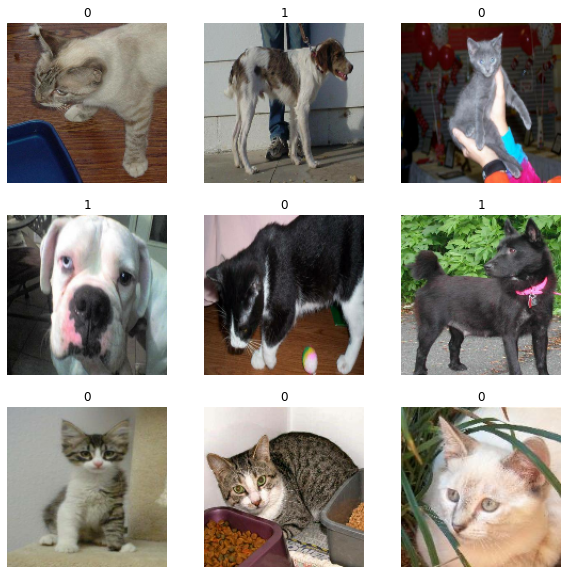

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
validation_ds = keras.preprocessing.image_dataset_from_directory(
    train_validate_directory, 
    labels='inferred', 
    label_mode='binary', 
    class_names = ["cats","dogs"], 
    color_mode='rgb', 
    batch_size=BATCH_SIZE, 
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed = 1,
    validation_split = VALIDATION_SHARE,
    subset="validation"
)

Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

# from tensorflow.data.ops import dataset_ops
from tensorflow import keras
from keras.layers.preprocessing import image_preprocessing
from keras.preprocessing import dataset_utils
from tensorflow.python.ops import image_ops
from tensorflow.python.ops import io_ops
from tensorflow.python.util.tf_export import keras_export


WHITELIST_FORMATS = ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

## Tensorflow override method to return fname as list as well as dataset

def my_image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=BATCH_SIZE,
                                 image_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]),
                                 shuffle=True,
                                 seed=None,
                                 validation_split=None,
                                 subset=None,
                                 interpolation='bilinear',
                                 follow_links=False):
  
  if labels != 'inferred':
    if not isinstance(labels, (list, tuple)):
      raise ValueError(label_mode=None)
    if class_names:
      raise ValueError('You can only pass `class_names` if the labels are '
                       'inferred from the subdirectory names in the target '
                       'directory (`labels="inferred"`).')
    if label_mode not in {'int', 'categorical', 'binary', None}:
      raise ValueError(
        '`label_mode` argument must be one of "int", "categorical", "binary", '
        'or None. Received: %s' % (label_mode,))
    if color_mode == 'rgb':
      num_channels = 3
    elif color_mode == 'rgba':
      num_channels = 4
    elif color_mode == 'grayscale':
      num_channels = 1
    else:
      raise ValueError(
          '`color_mode` must be one of {"rbg", "rgba", "grayscale"}. '
          'Received: %s' % (color_mode,))
    interpolation = image_preprocessing.get_interpolation(interpolation)
    dataset_utils.check_validation_split_arg(
        validation_split, subset, shuffle, seed)
    
    if seed is None:
      seed = np.random.randint(1e6)
    image_paths, labels, class_names = dataset_utils.index_directory(
      directory,
      labels,
      formats=WHITELIST_FORMATS,
      class_names=class_names,
      shuffle=shuffle,
      seed=seed,
      follow_links=follow_links)

  if label_mode == 'binary' and len(class_names) != 2:
    raise ValueError(
        'When passing `label_mode="binary", there must exactly 2 classes. '
        'Found the following classes: %s' % (class_names,))

  image_paths, labels = dataset_utils.get_training_or_validation_split(
      image_paths, labels, validation_split, subset)
  
  dataset = paths_and_labels_to_dataset(
      image_paths=image_paths,
      image_size=image_size,
      num_channels=num_channels,
      labels=labels,
      label_mode=label_mode,
      num_classes=len(class_names),
      interpolation=interpolation)
  if shuffle:
    # Shuffle locally at each iteration
    dataset = dataset.shuffle(buffer_size=BATCH_SIZE * 8, seed=seed)
  dataset = dataset.batch(BATCH_SIZE)
  # Users may need to reference `class_names`.
  dataset.class_names = class_names
  return dataset, image_paths

def paths_and_labels_to_dataset(image_paths,
                                image_size,
                                num_channels,
                                labels,
                                label_mode,
                                num_classes,
                                interpolation):
  """Constructs a dataset of images and labels."""
  # TODO(fchollet): consider making num_parallel_calls settable
  path_ds = dataset_ops.Dataset.from_tensor_slices(image_paths)
  img_ds = path_ds.map(
      lambda x: path_to_image(x, image_size, num_channels, interpolation))
  if label_mode:
    label_ds = dataset_utils.labels_to_dataset(labels, label_mode, num_classes)
    img_ds = dataset_ops.Dataset.zip((img_ds, label_ds))
  return img_ds
def path_to_image(path, image_size, num_channels, interpolation):
  img = io_ops.read_file(path)
  img = image_ops.decode_image(
      img, channels=num_channels, expand_animations=False)
  img = image_ops.resize_images_v2(img, image_size, method=interpolation)
  img.set_shape((image_size[0], image_size[1], num_channels))
  return img

In [ ]:
testing_directory = '/content/drive/MyDrive/kaggle_dataset/dog-vs-cat-classification/test/test'

testing_ds = keras.preprocessing.image_dataset_from_directory(
    testing_directory, 
    label_mode=None, 
    color_mode='rgb', 
    batch_size=12500,
    image_size=IMAGE_SIZE, 
    shuffle=False,
    seed = 1
)

Found 8000 files belonging to 1 classes.


In [ ]:
print("Number of training batches: %d" % data.experimental.cardinality(training_ds))
print("Number of validation batches: %d" % data.experimental.cardinality(validation_ds))
print("Number of test batches: %d" % data.experimental.cardinality(testing_ds))

Number of training batches: 625
Number of validation batches: 157
Number of test batches: 1


In [ ]:
training_ds = training_ds.cache().prefetch(data.experimental.AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(data.experimental.AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(data.experimental.AUTOTUNE)

In [ ]:
base_model = keras.applications.VGG16(
    weights="imagenet",
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    include_top=False,
)

base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

# Câu 7

In [ ]:
from kerastuner import HyperModel

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
def build_model(hp):
    
    # create an input mode
    inputs = keras.Input(shape=(150,150,3))

    # data augmentation
    x = inputs
    
    # data standardization
    # omit rescaling as it will apparently be done as part of preprocessing
    x = layers.experimental.preprocessing.Resizing(150,150, interpolation='bilinear')(x)
     # preprocess  before parsing to the base model
    x = keras.applications.vgg16.preprocess_input(x)

    # feed the processed data into the frozen base model
    x = base_model(x, training=False)
    
    # add fully connected layers on top of the base model
    #
    # add a Flatten or a GlobalAveragePooling layer
    reduction_type = hp.Choice('reduction_type', ['flatten', 'avg'])
    if reduction_type == 'flatten':
        x = layers.Flatten()(x)
    else:
        x = layers.GlobalAveragePooling2D()(x)
    #
    # add a Dense layer
    x = layers.Dense(
        units=hp.Int('num_dense_units', min_value=128, max_value=1024, step=32),
        activation='relu')(x)
    # add a Dropout layer
    x = layers.Dropout(
        hp.Float('dense_dropout', min_value=0.0, max_value=0.9)
    )(x)
    #
    # add the final layer
    outputs = layers.Dense(1)(x)
    #
    # build the model
    model = keras.Model(inputs, outputs)
    #
    # let the learning rate vary
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    #
    # compile the model
    model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[keras.metrics.BinaryAccuracy()])
    #
    # print the summary
    model.summary()


    return model

In [ ]:
import kerastuner as kt

tuner = kt.tuners.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,
    overwrite=True)

callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                         mode='min', 
                                         patience=3, 
                                         restore_best_weights=True)]

tuner.search(training_ds,
             validation_data=validation_ds,
             callbacks=callbacks, 
             verbose=1, 
             epochs=5)
tuner.results_summary()

Trial 1 Complete [04h 00m 58s]
val_loss: 0.08957123756408691

Best val_loss So Far: 0.08957123756408691
Total elapsed time: 04h 00m 58s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
flatten           |avg               |reduction_type
896               |448               |num_dense_units
0.16031           |0.54414           |dense_dropout
0.0039815         |0.0062254         |learning_rate

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 resizing (Resizing)         (None, 150, 150, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 150, 150, 3)      0         
 licingOpLambda)                                                 
                             

KeyboardInterrupt: ignored

-Việc tunning trên 1 trial mất 4h khá lâu nên stop!

# Câu 8

-Huấn luyện với ResNet

In [ ]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.17.2

In [ ]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input
IMAGE_SIZE = 150
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

base_model = ResNet50(
    include_top=False, weights=None, input_tensor=input_tensor,
    input_shape=None)

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
model=Model(inputs=base_model.input,outputs=Dense(1)(x))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

# Important, calculate a valid step size for the validation dataset

model.compile(loss = 'mean_squared_error', optimizer='adam', 
              metrics=[RootMeanSquaredError(name="rmse")])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=50, verbose=1, mode='auto',
        restore_best_weights=True)

history = model.fit(training_ds, epochs=50, steps_per_epoch=3, 
                    validation_data = validation_ds, callbacks=[monitor],
                    verbose = 1, validation_steps=5)

Epoch 1/50
3/3 [==============================] - 61s 10s/step - loss: 35.6439 - rmse: 5.9702 - val_loss: 175694.7812 - val_rmse: 419.1596
Epoch 2/50
3/3 [==============================] - 25s 10s/step - loss: 1.7260 - rmse: 1.3138 - val_loss: 1262367.2500 - val_rmse: 1123.5511
Epoch 3/50
3/3 [==============================] - 25s 9s/step - loss: 0.4522 - rmse: 0.6725 - val_loss: 31445.0039 - val_rmse: 177.3274
Epoch 4/50
3/3 [==============================] - 25s 9s/step - loss: 0.3515 - rmse: 0.5929 - val_loss: 4006548.0000 - val_rmse: 2001.6364
Epoch 5/50
3/3 [==============================] - 26s 10s/step - loss: 0.3270 - rmse: 0.5719 - val_loss: 24274784.0000 - val_rmse: 4926.9448
Epoch 6/50
3/3 [==============================] - 25s 9s/step - loss: 0.3380 - rmse: 0.5814 - val_loss: 10114446.0000 - val_rmse: 3180.3218
Epoch 7/50
3/3 [==============================] - 25s 9s/step - loss: 0.2719 - rmse: 0.5215 - val_loss: 5212715.0000 - val_rmse: 2283.1372
Epoch 8/50
3/3 [==========

-Huấn luyện với MobileNet

In [ ]:
IMG_SHAPE = (150, 150, 3)
import tensorflow as tf
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights=None)
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_150 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          368672    
                                                                 
 dropout_3 (Dropout)         (None, 3, 3, 32)          0         
                                                                 
 global_average_pooling2d_3   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,626,689
Trainable params: 368,705
Non-

In [ ]:
history = model.fit(training_ds,
                    steps_per_epoch=5, 
                    epochs=50,
                    validation_data=validation_ds,
                    validation_steps=5)

Epoch 1/50
5/5 [==============================] - 4s 822ms/step - loss: 0.6926 - accuracy: 0.5750 - val_loss: 0.6936 - val_accuracy: 0.4375
Epoch 2/50
5/5 [==============================] - 4s 810ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 3/50
5/5 [==============================] - 2s 540ms/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6934 - val_accuracy: 0.4375
Epoch 4/50
5/5 [==============================] - 2s 541ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 5/50
5/5 [==============================] - 2s 537ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.4375
Epoch 6/50
5/5 [==============================] - 2s 542ms/step - loss: 0.6935 - accuracy: 0.4500 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 7/50
5/5 [==============================] - 2s 544ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4375
Epoch 8/50
5/5 [====

# Câu 9

In [ ]:
def data_augmentation(x, hp):

    x = layers.experimental.preprocessing.RandomRotation(
        factor = hp.Float('random_rotation', min_value=0.05, max_value=0.2, step = 0.05)
    )(x)

    x = layers.experimental.preprocessing.RandomZoom(
        height_factor = hp.Float('random_zoom', min_value=0.05, max_value=0.2, step = 0.05)
    )(x)

    x = layers.experimental.preprocessing.RandomWidth(
        factor = hp.Float("random_width", min_value = 0.05, max_value = 0.2, step = 0.05)
    )(x)

    x = layers.experimental.preprocessing.RandomHeight(
        factor = hp.Float("random_height", min_value = 0.05, max_value = 0.2, step = 0.05)
    )(x)
    x = layers.experimental.preprocessing.RandomTranslation(
        height_factor = hp.Float("rand_trans_h", min_value = 0.05, max_value = 0.2, step = 0.05),
        width_factor = hp.Float("rand_trans_w", min_value = 0.05, max_value = 0.2, step = 0.05)
    )(x)

    x = layers.experimental.preprocessing.RandomFlip(
        mode = hp.Choice('random_flip', ['horizontal', 'vertical'])
    )(x)
    return x

def build_model(hp):
    
    # create an input mode
    inputs = keras.Input(shape=(150,150,3))

    # data augmentation
    x = data_augmentation(inputs, hp)
    
    # data standardization
    # omit rescaling as it will apparently be done as part of preprocessing
    x = layers.experimental.preprocessing.Resizing(150,150, interpolation='bilinear')(x)
    
    # preprocess  before parsing to the base model
    x = keras.applications.vgg16.preprocess_input(x)

    # feed the processed data into the frozen base model
    x = base_model(x, training=False)

    reduction_type = hp.Choice('reduction_type', ['flatten', 'avg'])
    if reduction_type == 'flatten':
        x = layers.Flatten()(x)
    else:
        x = layers.GlobalAveragePooling2D()(x)
    #
    # add a Dense layer
    x = layers.Dense(
        units=hp.Int('num_dense_units', min_value=128, max_value=1024, step=32),
        activation='relu'
    )(x)
    #
    # add a Dropout layer
    x = layers.Dropout(
        hp.Float('dense_dropout', min_value=0.0, max_value=0.9)
    )(x)
    outputs = layers.Dense(1)(x)
    #
    # build the model
    model = keras.Model(inputs, outputs)
    #
    # let the learning rate vary
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    #
    # compile the model
    model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[keras.metrics.BinaryAccuracy()])
    #
    # print the summary
    model.summary()

    return model

# Câu 10

In [ ]:
import kerastuner as kt

tuner = kt.tuners.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,
    overwrite=True)

callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                         mode='min', 
                                         patience=3, 
                                         restore_best_weights=True)]

tuner.search(training_ds,
             validation_data=validation_ds,
             callbacks=callbacks, 
             verbose=1, 
             epochs=5)
tuner.results_summary()

Trial 1 Complete [00h 26m 31s]
val_loss: 0.6929373741149902

Best val_loss So Far: 0.6929373741149902
Total elapsed time: 00h 26m 31s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
0.2               |0.1               |random_rotation
0.15              |0.15              |random_zoom
0.2               |0.15              |random_width
0.15              |0.1               |random_height
0.15              |0.15              |rand_trans_h
0.1               |0.1               |rand_trans_w
horizontal        |horizontal        |random_flip
flatten           |flatten           |reduction_type
768               |544               |num_dense_units
0.26901           |0.87888           |dense_dropout
0.0012341         |0.0034026         |learning_rate

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
  

KeyboardInterrupt: ignored

-1 Trial mất khoảng 30p, chạy thử trial 1

##Chua thấy kết quả kaggle